In [1]:
from functions import *
import functions as fn

 [astropy.io.fits.verify]


SIMPLE  =                    T  / Standard Fits                                 
BITPIX  =                   16  / Bits par pixel                                
NAXIS   =                    2  / Nombre de dimensions                          
NAXIS1  =                 2720  / Axe des X                                     
NAXIS2  =                  512  / Axe des Y                                     
BSCALE  =           1.000000E0  / REAL = TAPE*BSCALE + BZERO                    
BZERO   =           3.276800E4  /                                               
OBJECT  = 'lampecuar'          / Nom de l'objet                                 
OBSERVAT= 'omm     '           / Observatoire                                   
EXPTIME =                 5.00  / Temps d'exposition (sec)                      
DARKTIME=                 5.00  / Temps total ecoule (sec)                      
IMAGETYP= 'comp    '           / Objet, Flat, Bias, etc.                        
DATE-OBS= '2019-10-27T08:19:

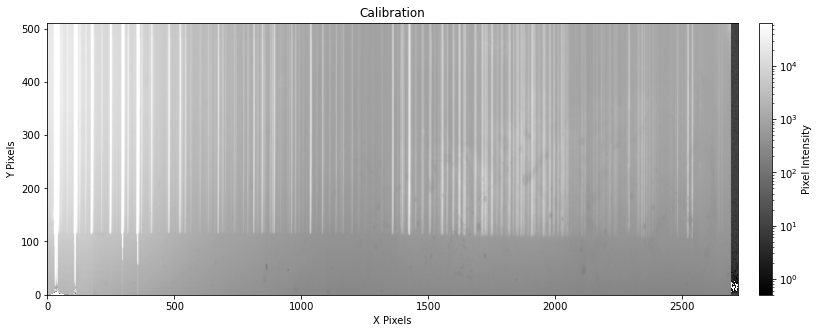

In [2]:
master_bias = np.load('data/master_bias.npy')
arc = fn.read_fits('data/calibration.fits', True)
arc = arc - master_bias
fn.plot_fits(arc, 'Calibration')

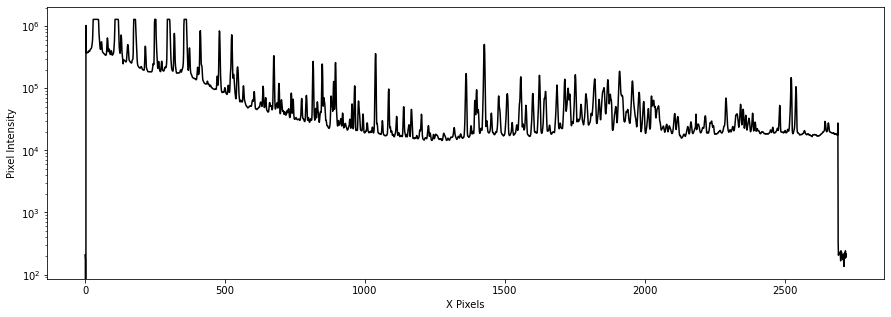

In [3]:
arc_spectrum = fn.spectrum(arc, 300, 20)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(arc_spectrum, color='black')    
ax.set_xlabel('X Pixels')
ax.set_ylabel('Pixel Intensity')
ax.set_yscale('log')
#ax.set_ylim(1.7e4, 1.75e4)
plt.show()

In [4]:
spatial_resolution = 1.73  # angstroms per pixel

In [5]:
cuar = fn.read_fits('data/cuar.fits', True)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                29480 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2004-09-03T22:14:15' / Date FITS file was generated                  
IRAF-TLM= '15:14:15 (03/09/2004)' / Time of last modification                   
OBJECT  = '3250A   '           / Name of the object observed                    
OBSERVAT= 'KPNO              '  /  observatory                                  
OBSERVER= 'Willmarth         '  /  observers                                    
PROPID  = 'T&E               '  /  observing proposal ID                        
EXPTIME =             100.14

In [6]:
lambda0 = 3053.5651855469  # angstroms
dlambda = 0.25  # angstroms
ref_pix = 1  # pixel number

wavelengths = np.arange(lambda0, lambda0 + len(cuar) * dlambda, dlambda)

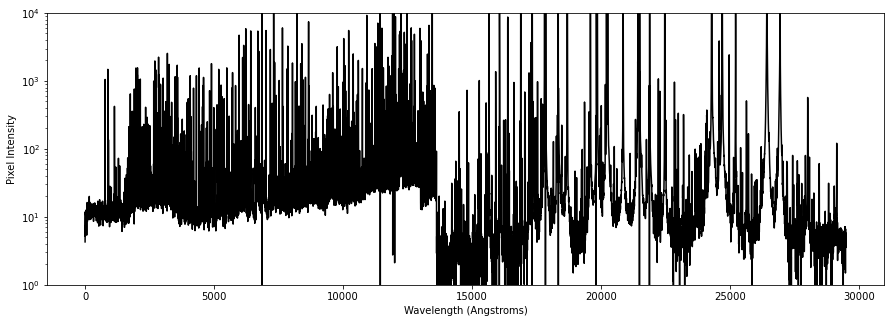

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(cuar ,color='black')    
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Pixel Intensity')
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_ylim(1, 1e4)
plt.show()

In [11]:
peaks, positions = fn.find_peaks_in_threshold(cuar[0:12000], 50, 200)

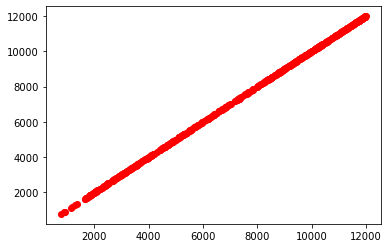

In [12]:
plt.scatter(positions, peaks, color='red')